# Setup

In [2]:
#@title **Import statements** - Click 'Run' to import
#@markdown - existing Python libraries
#@markdown - auxiliary .py files from drive

import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
import time

import distributions as pd

# Define target distribution
The target probability distribution from which we want to sample is $\pi$ with density function
$$\mathrm{d}\pi = \frac{1}{Z} \exp(-V(x))\,\mathrm{d}x. $$
Possible densities from distributions.py:

| Distribution | Potential $V(x)$ | Density $\frac{\mathrm{d}\pi}{\mathrm{d}x}$ | MY envelope $V^\gamma$ | MY-smoothed density $\frac{\mathrm{d}\pi^\gamma}{\mathrm{d}x}$ |
| --- | --- | --- | --- | --- |
| Normal (mu=0, $\sigma$=1) | $$\frac{1}{2\sigma^2} \lVert x-\mu\rVert_2^2$$ | $$ (2\pi\sigma^2)^{-d/2}\exp\left(-\frac{1}{2\sigma} \lVert x-\mu\rVert_2^2\right)$$ | $$\frac{1}{2(\sigma^2+\gamma)} \lVert x-\mu\rVert_2^2$$ | $$ (2\pi(\sigma^2+\gamma))^{-d/2}\exp\left(-\frac{1}{2(\sigma^2+\gamma)} \lVert x-\mu\rVert_2^2\right)$$ |
| Laplace (mu=0, b=1) | $$\frac{\lVert x - \mu \rVert_1}{b}$$ | $$\frac{1}{2b}\exp\left(-\frac{\lVert x - \mu \rVert_1}{b}\right)$$ | $$S_\gamma(x) = \textrm{sign}(x)\max(|x|-\gamma,0)$$ |  |
| Uniform (a=-1,b=1) | $$\iota_{[a,b]}$$ | $$\frac{1}{b-a} \chi_{[a,b]}$$ |  |  |


In [5]:
mu = 0
sigma = 1
gamma = 0.3
my_normal = pd.MY_NormalDist(mu, sigma, gamma)
normal = pd.MY_NormalDist(mu,sigma,0) # is the same as NormalDist(mu,b)

n_samples = 500000
h0 = 1
maxiter = 100
key = random.PRNGKey(238953267) # initialize pseudo-random number generator (PRNG)
key, subkey = random.split(key)
X = random.normal(subkey, (n_samples,))

i = 0
start_time = time.process_time()
while i < maxiter:
  i=i+1
  h = h0/i
  key, subkey = random.split(key) # update state of PRNG, otherwise it would create the same numbers again
  X = X - h*my_normal.grad_pot(X) + jnp.sqrt(2*h) * random.normal(subkey, (n_samples,))

print('elapsed time: ' + str(time.process_time() - start_time) + ' s\n')

elapsed time: 1.5221289959999993 s



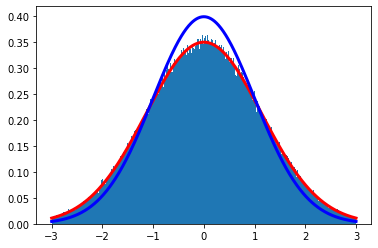

In [6]:
grid = jnp.linspace(-3,3,501)
plt.hist(X,bins=grid,density=True)
plt.plot(grid, my_normal.density(grid), 'r', linewidth=3)
plt.plot(grid, normal.density(grid), 'b', linewidth=3)